
# Explore and structure data

In [1]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [3]:
#!kaggle competitions download -c competitive-data-science-predict-future-sales --force

In [4]:
#!gunzip sample_submission.csv.gz
#!gunzip sales_train.csv.gz
#!gunzip test.csv.gz

In [5]:
#!mv shops.csv data
#!mv items.csv data
#!mv item_categories.csv data
#!mv sales_train_v2.csv data
#!mv sample_submission.csv data
#!mv test.csv data

In [6]:
PATH = 'data/'

In [7]:
pd.read_csv('data/sample_submission.csv').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
from IPython.display import HTML, display
PATH = "data/"
table_names = ['sales_train_v2', 'shops', 'items', 'item_categories', 'test']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
train, shops, items, cats, test = tables

In [10]:
for t in test, train: display(DataFrameSummary(t).summary()) 

,ID,shop_id,item_id
count,214200,214200,214200
mean,107100,31.6429,11019.4
std,61834.4,17.5619,6252.64
min,0,2,30
25%,53549.8,16,5381.5
50%,107100,34.5,11203
75%,160649,47,16071.5
max,214199,59,22167
counts,214200,214200,214200
uniques,214200,42,5100


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,NaN,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06
mean,NaN,14.5699,33.0017,10197.2,890.853,1.24264
std,NaN,9.42299,16.227,6324.3,1729.8,2.61883
min,NaN,0,0,0,-1,-22
25%,NaN,7,22,4476,249,1
50%,NaN,14,31,9343,399,1
75%,NaN,23,47,15684,999,1
max,NaN,33,59,22169,307980,2169
counts,2935849,2935849,2935849,2935849,2935849,2935849
uniques,1034,34,60,21807,19993,198


In [11]:
len(train)

2935849

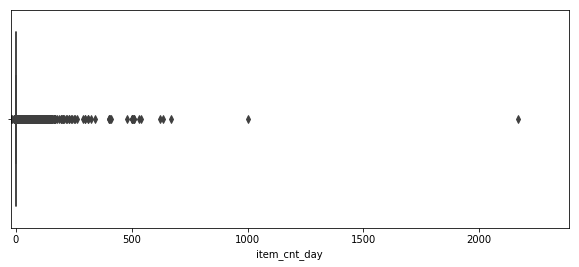

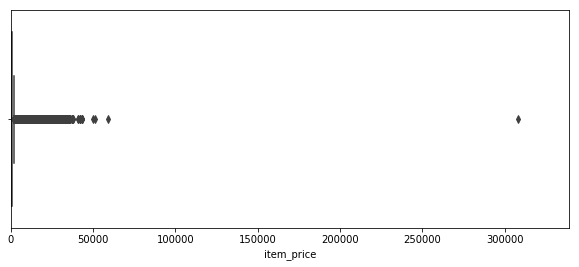

In [12]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_cnt_day.min(), train.item_cnt_day.max()*1.1)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train['item_price'].min(), train['item_price'].max()*1.1)
sns.boxplot(x=train.item_price)

In [13]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1000]

In [14]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [15]:
shops.loc[shops['shop_name'] == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

cats['split'] = cats['item_category_name'].str.split('-')
cats['type'] = cats['split'].map(lambda x: x[0].strip())
cats['type_code'] = LabelEncoder().fit_transform(cats['type'])
# if subtype is nan then type
cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats['subtype_code'] = LabelEncoder().fit_transform(cats['subtype'])
cats = cats[['item_category_id','type_code', 'subtype_code']]

items.drop(['item_name'], axis=1, inplace=True)

In [16]:
len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))), len(list(set(test.item_id))), len(test)

(363, 5100, 214200)

In [17]:
train = train.drop('item_price', axis=1)

In [18]:
train_items = train['item_id'].unique()

In [19]:
test_items = test['item_id'].unique()

In [20]:
train = train.where(train['item_id'].isin(test_items)).dropna()
train = pd.concat([train,test], sort=False).drop_duplicates().reset_index(drop=True)

In [21]:
len(train['item_id'].unique())

5100

In [22]:
len(test['item_id'].unique())

5100

In [23]:
train.drop('ID', 1, inplace=True)

In [24]:
train_shops = train['shop_id'].unique()

In [25]:
test_shops = test['shop_id'].unique()

In [26]:
train = train.where(train['shop_id'].isin(test_shops)).dropna()

In [27]:
len(train['shop_id'].unique())

42

In [28]:
len(test['shop_id'].unique())

42

In [29]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [30]:
len(train), len(test)

(1227778, 214200)

In [31]:
train['date_block_num'].min(), train['date_block_num'].max()

(0.0, 33.0)

In [32]:
test['date_block_num'] = 34

In [33]:
#add_datepart(train_df, "date", drop=False)
#add_datepart(test_df, "date", drop=False)

In [34]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [35]:
train_df = train.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day':'sum'})

In [36]:
train_df = pd.merge(train_df, shops, on=['shop_id'], how='left')
train_df = pd.merge(train_df, items, on=['item_id'], how='left')
train_df = pd.merge(train_df, cats, on=['item_category_id'], how='left')
train_df['city_code'] = train_df['city_code'].astype(np.int8)
train_df['item_category_id'] = train_df['item_category_id'].astype(np.int8)
train_df['type_code'] = train_df['type_code'].astype(np.int8)
train_df['subtype_code'] = train_df['subtype_code'].astype(np.int8)

test = pd.merge(test, shops, on=['shop_id'], how='left')
test = pd.merge(test, items, on=['item_id'], how='left')
test = pd.merge(test, cats, on=['item_category_id'], how='left')
test['city_code'] = test['city_code'].astype(np.int8)
test['item_category_id'] = test['item_category_id'].astype(np.int8)
test['type_code'] = test['type_code'].astype(np.int8)
test['subtype_code'] = test['subtype_code'].astype(np.int8)

In [37]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_day,city_code,item_category_id,type_code,subtype_code
0,0.0,2.0,33.0,1.0,0,37,11,1
1,0.0,2.0,482.0,1.0,0,73,15,0
2,0.0,2.0,491.0,1.0,0,73,15,0
3,0.0,2.0,839.0,1.0,0,73,15,0
4,0.0,2.0,1007.0,3.0,0,67,14,52


In [38]:
test_df = test
test_df.head()

,ID,shop_id,item_id,date_block_num,city_code,item_category_id,type_code,subtype_code
0,0,5,5037,34,3,19,5,10
1,1,5,5320,34,3,55,13,2
2,2,5,5233,34,3,19,5,10
3,3,5,5232,34,3,23,5,16
4,4,5,5268,34,3,20,5,11


In [39]:
train_df.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city_code', 'cats', 'type_code', 'subtype_code']
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,cats,type_code,subtype_code
0,0.0,2.0,33.0,1.0,0,37,11,1
1,0.0,2.0,482.0,1.0,0,73,15,0
2,0.0,2.0,491.0,1.0,0,73,15,0
3,0.0,2.0,839.0,1.0,0,73,15,0
4,0.0,2.0,1007.0,3.0,0,67,14,52


In [40]:
train_df.head(10)

,date_block_num,shop_id,item_id,item_cnt_month,city_code,cats,type_code,subtype_code
0,0.0,2.0,33.0,1.0,0,37,11,1
1,0.0,2.0,482.0,1.0,0,73,15,0
2,0.0,2.0,491.0,1.0,0,73,15,0
3,0.0,2.0,839.0,1.0,0,73,15,0
4,0.0,2.0,1007.0,3.0,0,67,14,52
5,0.0,2.0,1010.0,1.0,0,67,14,52
6,0.0,2.0,1023.0,2.0,0,67,14,52
7,0.0,2.0,1204.0,1.0,0,55,13,2
8,0.0,2.0,1224.0,1.0,0,55,13,2
9,0.0,2.0,1247.0,1.0,0,55,13,2


In [41]:
train_df.head().T.head(40)

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,2.0,2.0,2.0,2.0,2.0
item_id,33.0,482.0,491.0,839.0,1007.0
item_cnt_month,1.0,1.0,1.0,1.0,3.0
city_code,0.0,0.0,0.0,0.0,0.0
cats,37.0,73.0,73.0,73.0,67.0
type_code,11.0,15.0,15.0,15.0,14.0
subtype_code,1.0,0.0,0.0,0.0,52.0


In [42]:
train_df['item_cnt_month'].mean()

2.689742217672514

In [43]:
len(train_df), len(test_df)

(601748, 214200)

In [44]:
dep = 'item_cnt_month'
test_df[dep] = 0

In [45]:
test_df.columns = ['ID', 'shop_id', 'item_id', 'date_block_num', 'city_code', 'cats', 'type_code', 'subtype_code', 'item_cnt_month']
test_df.head()

,ID,shop_id,item_id,date_block_num,city_code,cats,type_code,subtype_code,item_cnt_month
0,0,5,5037,34,3,19,5,10,0
1,1,5,5320,34,3,55,13,2,0
2,2,5,5233,34,3,19,5,10,0
3,3,5,5232,34,3,23,5,16,0
4,4,5,5268,34,3,20,5,11,0


In [46]:
#cat_vars = ['shop_id', 'item_id', 'cats', 'Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
#            'Is_quarter_start', 'Is_year_end', 'Is_year_start']

#contin_vars = ['item_price', 'item_cnt_day', 'item_cnt_month']

cat_vars = ['shop_id', 'item_id', 'city_code', 'cats', 'type_code', 'subtype_code']

contin_vars = [] #'item_price'

n = len(train_df); n

601748

In [47]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,cats,type_code,subtype_code
0,0.0,2.0,33.0,1.0,0,37,11,1
1,0.0,2.0,482.0,1.0,0,73,15,0
2,0.0,2.0,491.0,1.0,0,73,15,0
3,0.0,2.0,839.0,1.0,0,73,15,0
4,0.0,2.0,1007.0,3.0,0,67,14,52


In [48]:
train_df = train_df[cat_vars+contin_vars+[dep, 'date_block_num']].copy()

In [49]:
test_df.isna().any()

ID                False
shop_id           False
item_id           False
date_block_num    False
city_code         False
cats              False
type_code         False
subtype_code      False
item_cnt_month    False
dtype: bool

In [50]:
test_df = test_df[cat_vars+contin_vars+[dep, 'date_block_num', 'ID']].copy()
test_df.head()

,shop_id,item_id,city_code,cats,type_code,subtype_code,item_cnt_month,date_block_num,ID
0,5,5037,3,19,5,10,0,34,0
1,5,5320,3,55,13,2,0,34,1
2,5,5233,3,19,5,10,0,34,2
3,5,5232,3,23,5,16,0,34,3
4,5,5268,3,20,5,11,0,34,4


In [51]:
#test_df_items = test_df['item_id'].unique()
#asdf=train_df.append(test_df.where(not train['item_id'].isin(test_df_items)))

#train = train.where(train['item_id'].isin(test_items)).dropna()

In [52]:
#imputer = Imputer()
#values = train_df[contin_vars].values
#train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
#test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [53]:
len(train_df), len(train_df)/5

(601748, 120349.6)

In [54]:
train_df.isna().sum(), test_df.isna().sum()

(shop_id           0
 item_id           0
 city_code         0
 cats              0
 type_code         0
 subtype_code      0
 item_cnt_month    0
 date_block_num    0
 dtype: int64, shop_id           0
 item_id           0
 city_code         0
 cats              0
 type_code         0
 subtype_code      0
 item_cnt_month    0
 date_block_num    0
 ID                0
 dtype: int64)

In [55]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601748 entries, 0 to 601747
Data columns (total 8 columns):
shop_id           601748 non-null float64
item_id           601748 non-null float64
city_code         601748 non-null int8
cats              601748 non-null int8
type_code         601748 non-null int8
subtype_code      601748 non-null int8
item_cnt_month    601748 non-null float32
date_block_num    601748 non-null float64
dtypes: float32(1), float64(3), int8(4)
memory usage: 23.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 9 columns):
shop_id           214200 non-null int64
item_id           214200 non-null int64
city_code         214200 non-null int8
cats              214200 non-null int8
type_code         214200 non-null int8
subtype_code      214200 non-null int8
item_cnt_month    214200 non-null float32
date_block_num    214200 non-null int64
ID                214200 non-null int64
dtypes: float32(1), int64(4), int8(4

(None, None)

In [56]:
samp_size = n
#idxs = train_df[train_df['date_block_num'] >= 24].index
#idxs = train_df[train_df['date_block_num'] >= 30].index
#train_df = train_df.iloc[idxs]
len(train_df)

601748

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601748 entries, 0 to 601747
Data columns (total 8 columns):
shop_id           601748 non-null float64
item_id           601748 non-null float64
city_code         601748 non-null int8
cats              601748 non-null int8
type_code         601748 non-null int8
subtype_code      601748 non-null int8
item_cnt_month    601748 non-null float32
date_block_num    601748 non-null float64
dtypes: float32(1), float64(3), int8(4)
memory usage: 23.0 MB


In [58]:
len(train_df)

601748

In [59]:
for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
#train_cats(train_df)

In [60]:
len(test_df)

214200

In [61]:
for v in cat_vars: test_df[v] = test_df[v].astype('category').cat.as_ordered()
#apply_cats(test_df, train_df)

In [62]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [63]:
#joined_samp = train_df.set_index('date_block_num')
joined_samp = train_df
joined_samp.sort_values(by='date_block_num', inplace=True)
joined_samp.reset_index(inplace=True)

In [64]:
len(joined_samp)

601748

In [65]:
df, y, nas, mapper = proc_df(joined_samp, 'item_cnt_month', do_scale=True)

In [66]:
len(test_df)

214200

In [67]:
#joined_test = test_df.set_index('date_block_num')
joined_test = test_df
joined_test.sort_values('date_block_num', inplace=True)
joined_test.reset_index(inplace=True)

In [68]:
df_test, _, nas, mapper = proc_df(joined_test, 'item_cnt_month', do_scale=True, 
                                  skip_flds=['ID'], mapper=mapper, na_dict=nas)

In [69]:
len(df_test)

214200

In [70]:
len(df)

601748

In [71]:
#df['date_block_num'].min(), df['date_block_num'].max()

In [72]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [73]:
y

array([ 1.,  4.,  1., ..., 13.,  1.,  1.], dtype=float32)

In [74]:
yl = np.log(y)
max_log_y = np.max(y)
y_range = (0, max_log_y*1.2)

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [75]:
#np.set_printoptions(threshold=np.nan)
#yl

In [76]:
val_idx = train_df[train_df['date_block_num'] >= 30].index

len(val_idx), #len(idxs), (len(val_idx)/len(idxs))*100

(110572,)

In [77]:
len(val_idx), len(yl), len(df), len(df_test)

(110572, 601748, 601748, 214200)

In [78]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601748 entries, 0 to 601747
Data columns (total 9 columns):
level_0           601748 non-null float64
index             601748 non-null float64
shop_id           601748 non-null int8
item_id           601748 non-null int16
city_code         601748 non-null int8
cats              601748 non-null int8
type_code         601748 non-null int8
subtype_code      601748 non-null int8
date_block_num    601748 non-null float64
dtypes: float64(3), int16(1), int8(5)
memory usage: 17.8 MB


In [80]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [81]:
cat_sz

[('shop_id', 43),
 ('item_id', 4717),
 ('city_code', 29),
 ('cats', 61),
 ('type_code', 15),
 ('subtype_code', 49)]

In [82]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [83]:
emb_szs

[(43, 22), (4717, 50), (29, 15), (61, 31), (15, 10), (49, 25)]

In [84]:
df.isna().any()

level_0           False
index             False
shop_id           False
item_id           False
city_code         False
cats              False
type_code         False
subtype_code      False
date_block_num    False
dtype: bool

In [85]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [86]:
lr = 1e-4
m.lr_find()

  0%|                                                                               | 0/3838 [00:01<?, ?it/s, loss=inf]


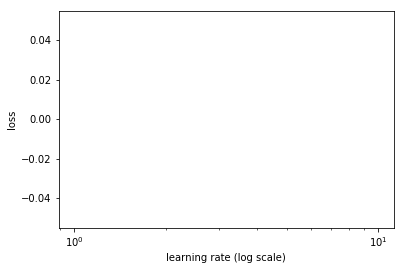

In [87]:
m.sched.plot()

In [88]:
lr = 1e-4 #0.0005

In [89]:
len(val_idx), len(yl), len(df), len(df_test)

(110572, 601748, 601748, 214200)

In [90]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
m.save("predict_sales_3E")

In [ ]:
m.load("predict_sales_3E")

In [ ]:
m.fit(lr, 1, cycle_len = 4, cycle_mult = 1, metrics=[exp_rmse])

In [ ]:
m.save("predict_sales_7E") 

In [ ]:
m.load("predict_sales_7E")

In [ ]:
m.fit(lr, 3, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

In [ ]:
m.save("predict_sales_7E_12ER") 

# Test Set

In [ ]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

In [ ]:
log_preds = m.predict(True)

In [ ]:
log_preds

In [ ]:
log_test = np.exp(log_preds)

In [ ]:
log_test

In [ ]:
len(test), len(df_test)

In [ ]:
test['item_cnt_month'] = log_test

In [ ]:
test.head()

In [ ]:
csv_fn=f'{PATH}submission.csv'

test[['ID','item_cnt_month']].to_csv(csv_fn, index=False)

In [ ]:
test[['ID','item_cnt_month']]